# Boston housing price analysis

In [101]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df=pd.read_csv(boston_url)

## 1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
- #### Compasrison Graph (MEDV = the median value of houses)

<AxesSubplot:xlabel='bounded_by_the_Charles_river', ylabel='MEDV'>

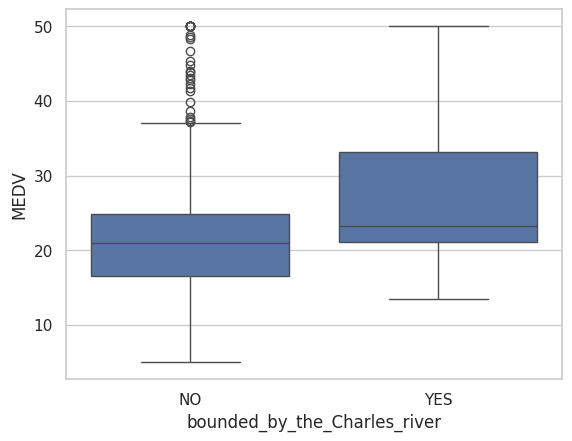

In [92]:
# show box plot CHAS==1 or not==0
boston_df.loc[(boston_df['CHAS'] == 1), 'bounded_by_the_Charles_river'] = 'YES'
boston_df.loc[(boston_df['CHAS'] == 0), 'bounded_by_the_Charles_river'] = 'NO'
sns.boxplot(x='bounded_by_the_Charles_river', y="MEDV", data=boston_df)

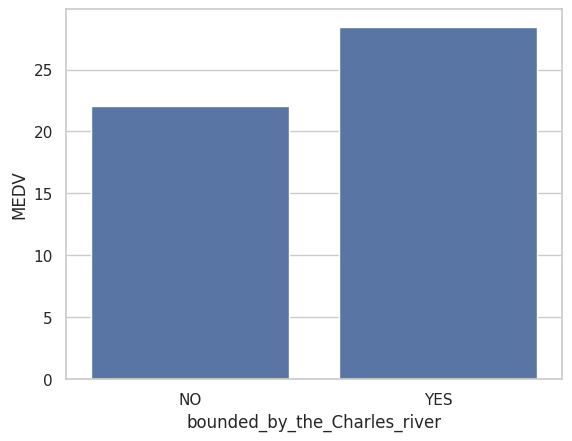

In [93]:
# show barchart by CHAS
df_chas_or_not = boston_df.groupby("bounded_by_the_Charles_river")[["MEDV"]].mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x='bounded_by_the_Charles_river', y="MEDV", data=df_chas_or_not)

- #### Hypothesis testing (T-test)
    - H_0 = There is a significant difference in median value of houses bounded by the Charles river.
    - H_1 = There is **not** a significant difference in median value of houses bounded by the Charles river.

In [94]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

- #### Conclusion:
    P-Value is less than 0.05. Reject H_1 pypothesis.
    #### *There is a significant difference in median value of houses bounded by the Charles river*




## 2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- #### Compasrison Graph

Text(0.5, 1.0, 'Difference price group by age')

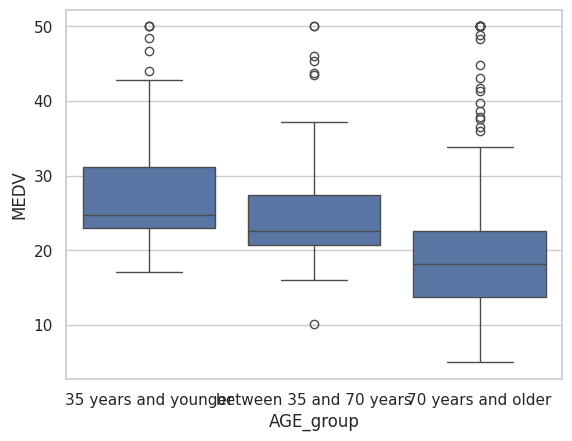

In [95]:
boston_df = boston_df.sort_values('AGE')

# setting age category
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

# make boxplot x=age, y=average
sns.boxplot(x="AGE_group", y="MEDV", data=boston_df)
ax.set_title("Difference price group by age")

- #### Hypothesis testing (ANOVA)
    - H_0 =  There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
    - H_1 = There is **not** difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [96]:
scipy.stats.levene(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374833, pvalue=0.06295337343259205)

- #### Conclusion:
    P-Value is greater than 0.05. We will fail to reject H_1.

    #### *There is not significant difference in median value of houses bounded by the age. So the Age of house not expected effects price.*

## 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- #### Compasrison Graph (NOX = Nitric oxide concentrations, INDUS = proportion of non-retail business acres per town)

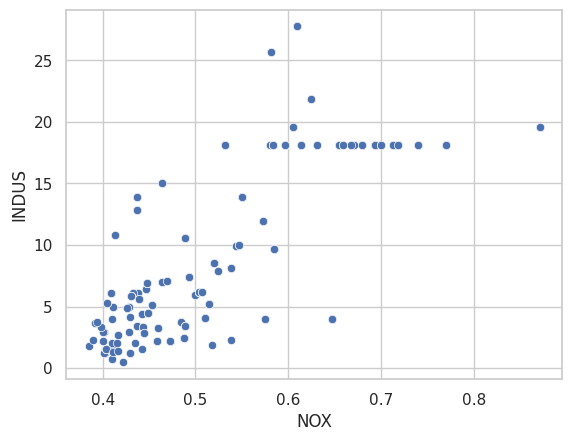

In [97]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

- #### Hypothesis testing (Pearson Correlation)
    - H_0 = there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
    - H_1 = There is **no** there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [98]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209164, pvalue=7.913361061231321e-98)

- #### Conclusion:
    P-Value is less than 0.05. Reject H_1 pypothesis.
    #### *There is a significant difference between Nitric oxide concentrations and proportion of non-retail business acres per town*

## 4. The pupil to teacher ratio histgram
PTRATIO = pupil teacher ratio by town

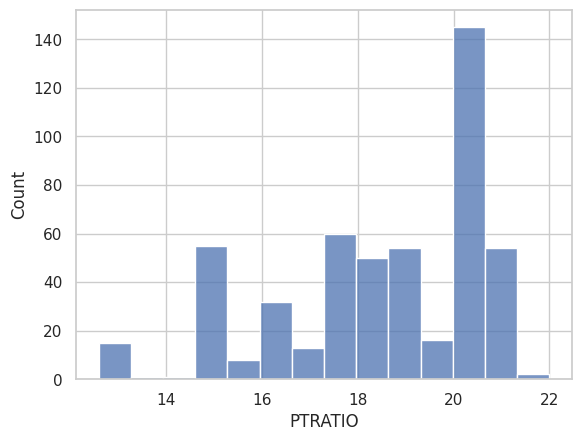

In [99]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)

## 5. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
Using Pearson correlation, the weighted distance to the five Boston employment centres affects the median value of owner occupied homes positive or nagative, or no correlation?

In [102]:
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:51:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### Conclusion:
    P-Value is less than 0.05. Reject H_1 pypothesis and statistic greater than 0 (posiotive correlation.
    #### *The weighted distance to the five Boston the weighted distance to the five Boston employment centres affects the median value of owner occupied homes positve.*